In [21]:
import os
from os.path import join as oj
import sys, time
sys.path.insert(1, oj(sys.path[0], '..'))  # insert parent path
sys.path.insert(1, oj(sys.path[0], '../vision_fit'))  # insert parent path
import time
import numpy as np
from tqdm import tqdm
from copy import deepcopy
import scipy
import pickle as pkl
import h5py
import warnings
warnings.filterwarnings("ignore")
import matplotlib.pyplot as plt
import seaborn as sns
import style
from imagenet_classes import lab_dict
import sklearn

%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [2]:
style.set_style()
import warnings
warnings.filterwarnings("ignore")

# get data on labs, preds, and feats

In [3]:
out_dir = '/accounts/projects/vision/scratch/yu_dl/raaz.rsk/cnns_preds'
fnames = os.listdir(out_dir)
print(fnames)

['alexnet_feats.h5', 'alexnet.h5', 'labs.h5', 'vgg11.h5', 'resnet18.h5', 'densenet169.h5']


In [4]:
labs_train = h5py.File(oj(out_dir, 'labs.h5'), 'r')['labs_train']
labs_val = h5py.File(oj(out_dir, 'labs.h5'), 'r')['labs_val']

In [5]:
preds_train = h5py.File(oj(out_dir, 'alexnet.h5'), 'r')['preds_train']
preds_val = h5py.File(oj(out_dir, 'alexnet.h5'), 'r')['preds_val']

In [6]:
feats_train = h5py.File(oj(out_dir, 'alexnet_feats.h5'), 'r')['feats_train']
feats_val = h5py.File(oj(out_dir, 'alexnet_feats.h5'), 'r')['feats_val']

In [7]:
# slightly diff sizes because part of last batch gets cut off for labs

In [8]:
print(labs_train.shape, labs_val.shape, preds_train.shape)
n = labs_train.size

(1281100,) (50000,) (1281150, 1000)


# look at a class

In [9]:
lab_num = 1
print(lab_dict[lab_num])

goldfish, Carassius auratus


In [10]:
print(labs_train.shape, preds_train[:, 0].shape)

(1281100,) (1281150,)


plt.scatter(preds_train[:n, 0], np.array(labs_train)==0)
plt.show()

**for data points in class, does larger pred mean closer to getting it right?**

In [23]:
preds_max_class_val = np.argmax(preds_val, axis=1)

electric ray, crampfish, numbfish, torpedo
[329   5 983   5   5   5   5   5   5   5   5   2 467   5  34   5   5 618
   5   5   5   5   5   3   5   5   6   5 394   5   5   5   5  36   5   5
   5   5   5 973 111   6   5 148 394   5   5   5  78   6]
15.536227 10.376371


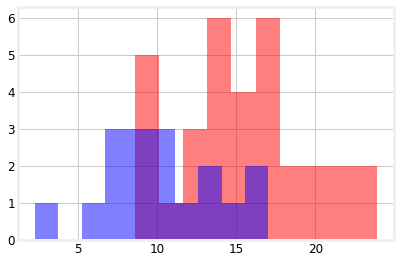

In [16]:
lab_num = 5
print(lab_dict[lab_num])

idxs = np.array(labs_val) == lab_num
preds = preds_val[idxs, lab_num]
preds_max_class = preds_max_class_val[idxs]
print(preds_max_class)
plt.hist(preds[preds_max_class == lab_num], color='red', alpha=0.5)
plt.hist(preds[preds_max_class != lab_num], color='blue', alpha=0.5)

print(np.mean(preds[preds_max_class == lab_num]), np.mean(preds[preds_max_class != lab_num]))
# plt.hist(labs_train, bins=1000)
plt.show()

**hist correct points top pred vs hist wrong points top pred**

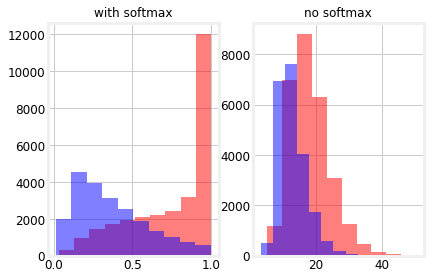

In [18]:
preds_max = np.max(scipy.special.softmax(preds_val, axis=1), axis=1)
preds_max_class_v = np.argmax(preds_val, axis=1)
labs = labs_val

plt.subplot(121)
plt.title('with softmax')
plt.hist(preds_max_val[preds_max_class_val == labs_val], color='red', alpha=0.5)
plt.hist(preds_max_val[preds_max_class_val != labs_val], color='blue', alpha=0.5)

plt.subplot(122)
plt.title('no softmax')
preds_max_val = np.max(preds_val, axis=1)
plt.hist(preds_max_val[preds_max_class_val == labs_val], color='red', alpha=0.5)
plt.hist(preds_max_val[preds_max_class_val != labs_val], color='blue', alpha=0.5)
plt.show()

In [19]:
feats_train.shape

(1281150, 4096)

# look at pairwise similarities

In [23]:
from sklearn import metrics

In [ ]:
sims = metrics.pairwise.cosine_similarity(feats_train)
print(sims.shape)

In [ ]:
np.save('sims.npy', sims)